In [13]:
import nglview as nv
from script import KEX
from openbabel import openbabel

## Förbereda 2q0s filen

 - Inhibitor tas bort manuellt i pymol
 - Serinet modifieras i openbabel via konvertering via xyz format

In [12]:
def pdb_to_xyz_to_pdb(input_pdb):
    obConversion = openbabel.OBConversion()
    
    # Läs in PDB
    obConversion.SetInAndOutFormats("pdb", "xyz")
    mol = openbabel.OBMol()
    obConversion.ReadFile(mol, input_pdb)
    
    # Skriv till XYZ
    obConversion.WriteFile(mol, "temp.xyz")
    obConversion.CloseOutFile()
    
    # Läs in XYZ
    obConversion = openbabel.OBConversion()
    obConversion.SetInAndOutFormats("xyz", "pdb")
    mol2 = openbabel.OBMol()
    obConversion.ReadFile(mol2, "temp.xyz")
    
    # Skriv till slutlig PDB
    obConversion.WriteFile(mol2, "test.pdb")
    obConversion.CloseOutFile()

In [3]:
pdb_to_xyz_to_pdb("pymol_2q0s_serine.pdb")
#Får inte ut någon ändring av SER

## Ladda in 2q0s

In [15]:
s = KEX("2q0s_full.pdb")

## Skapa liganderna 

In [16]:
s.create_molecule(smiles = "C[C@H](O)c1ccccc1", name = "S_substrate", show_structure= False)
s.create_molecule(smiles = "C[C@@H](O)c1ccccc1", name = "R_substrate", show_structure= False)

Molecule saved as S_substrate.mol
Molecule saved as R_substrate.mol


In [17]:
s.mol_to_pdbqt_new("S_substrate.mol", add_ligand = True)
s.mol_to_pdbqt_new("R_substrate.mol", add_ligand = True)

## Mutera

In [7]:
# s.mutations(subunits = "All", positions = (149, 153), mutations = ("VAL", "VAL"), label = "serine)
# s.mutations(subunits = "All", positions = (153, 173), mutations = ("VAL", "VAL"), label = "serine")

## MD

In [8]:
# Lägg till i detta i klassen, allt kan göras i pdb mappen

## Acetylerat serin

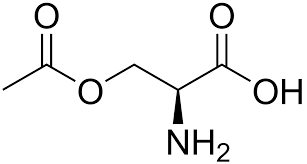

In [9]:
s.create_molecule(smiles = "N[C@@H](COC(=O)C)C(=O)O", name = "acetyl_serine", show_structure= True)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Molecule saved as acetyl_serine.mol


In [ ]:
s.mol_to_pdbqt_new("2q0s_md_mol2.mol2", add_ligand = False)

## Acetyleringen som ska byggas i pymol

- ATOM     14  C   UNK     1       1.948  -0.352   0.284  0.00  0.00    +0.304 C 
- ATOM     15  O   UNK     1       1.824  -1.101   1.242  0.00  0.00    -0.251 OA
- BRANCH  14  16
- ATOM     16  C   UNK     1       3.181   0.440  -0.025  0.00  0.00    +0.033 C 
- ATOM     17  H   UNK     1       2.950   1.508  -0.003  0.00  0.00    +0.034 HD
- ATOM     18  H   UNK     1       3.944   0.232   0.731  0.00  0.00    +0.034 HD
- ATOM     19  H   UNK     1       3.572   0.150  -1.003  0.00  0.00    +0.034 HD

## Konvertering från pqr till pdbqt

In [1]:
#u = mda.Universe(infile.pqr)
#u.atoms.write(outfile.pdbqt')
# spara alla byggda filer i pdb mappen och lägg in namnen i pdbfilenames listan inför docking

import MDAnalysis as mda

filenames = ["2q0s_acetyl_new"]

for filename in filenames:
    u = mda.Universe(f"{filename}.pqr")
    u.atoms.write(f'{filename}.pdbqt')




/Users/carlandersson/miniconda3/envs/kd1500/lib/python3.12/site-packages/MDAnalysis/coordinates/PDBQT.py:296: UserWarning: Supplied AtomGroup was missing the following attributes: altLocs, occupancies, tempfactors. These will be written with default values. 
  warnings.warn(


## Docking i smina

In [2]:
!smina --receptor 2q0s_acetyl_new.pdbqt --ligand R_substrate.pdbqt --out 2q0s_Rdocked.pdbqt --custom_scoring custom_scoring_new.txt \
    --center_x 20.721043365249557 --center_y 54.6562179849733 --center_z 28.330812924930342 --size_x 18 --size_y 18 --size_z 18 \
    --exhaustiveness 20 --num_modes 9 --log smina_output.log

   _______  _______ _________ _        _______ 
  (  ____ \(       )\__   __/( (    /|(  ___  )
  | (    \/| () () |   ) (   |  \  ( || (   ) |
  | (_____ | || || |   | |   |   \ | || (___) |
  (_____  )| |(_)| |   | |   | (\ \) ||  ___  |
        ) || |   | |   | |   | | \   || (   ) |
  /\____) || )   ( |___) (___| )  \  || )   ( |
  \_______)|/     \|\_______/|/    )_)|/     \|


smina is based off AutoDock Vina. Please cite appropriately.

Weights      Terms
-0.035579    gauss(o=0,_w=0.5,_c=8)
-0.005156    gauss(o=3,_w=2,_c=8)
0.840245     repulsion(o=0,_c=8)
-0.035069    hydrophobic(g=0.5,_b=1.5,_c=8)
-0.587439    non_dir_h_bond(g=-0.7,_b=0,_c=8)
1            electrostatic(i=2,_^=100,_c=8)
1.923        num_tors_div

Using random seed: 1939426912

0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
***************************************************

mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.

In [3]:
!smina --receptor 2q0s_acetyl_new.pdbqt --ligand S_substrate.pdbqt --out 2q0s_Sdocked_new.pdbqt --custom_scoring custom_scoring_new.txt \
    --center_x 20.721043365249557 --center_y 54.6562179849733 --center_z 28.330812924930342 --size_x 18 --size_y 18 --size_z 18 \
    --exhaustiveness 20 --num_modes 9 --log smina_output.log


   _______  _______ _________ _        _______ 
  (  ____ \(       )\__   __/( (    /|(  ___  )
  | (    \/| () () |   ) (   |  \  ( || (   ) |
  | (_____ | || || |   | |   |   \ | || (___) |
  (_____  )| |(_)| |   | |   | (\ \) ||  ___  |
        ) || |   | |   | |   | | \   || (   ) |
  /\____) || )   ( |___) (___| )  \  || )   ( |
  \_______)|/     \|\_______/|/    )_)|/     \|


smina is based off AutoDock Vina. Please cite appropriately.

Weights      Terms
-0.035579    gauss(o=0,_w=0.5,_c=8)
-0.005156    gauss(o=3,_w=2,_c=8)
0.840245     repulsion(o=0,_c=8)
-0.035069    hydrophobic(g=0.5,_b=1.5,_c=8)
-0.587439    non_dir_h_bond(g=-0.7,_b=0,_c=8)
1            electrostatic(i=2,_^=100,_c=8)
1.923        num_tors_div

Using random seed: 240055984

0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
***************************************************

mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b

In [23]:
!smina --receptor F149V_F153V_acetyl_md_fardig.pdbqt --ligand R_substrate.pdbqt --out F149V_F153V_Rdocked.pdbqt --custom_scoring custom_scoring_new.txt \
    --center_x 20.721043365249557 --center_y 54.6562179849733 --center_z 28.330812924930342 --size_x 18 --size_y 18 --size_z 18 \
    --exhaustiveness 20 --num_modes 9 --log smina_output.log

   _______  _______ _________ _        _______ 
  (  ____ \(       )\__   __/( (    /|(  ___  )
  | (    \/| () () |   ) (   |  \  ( || (   ) |
  | (_____ | || || |   | |   |   \ | || (___) |
  (_____  )| |(_)| |   | |   | (\ \) ||  ___  |
        ) || |   | |   | |   | | \   || (   ) |
  /\____) || )   ( |___) (___| )  \  || )   ( |
  \_______)|/     \|\_______/|/    )_)|/     \|


smina is based off AutoDock Vina. Please cite appropriately.

Weights      Terms
-0.035579    gauss(o=0,_w=0.5,_c=8)
-0.005156    gauss(o=3,_w=2,_c=8)
0.840245     repulsion(o=0,_c=8)
-0.035069    hydrophobic(g=0.5,_b=1.5,_c=8)
-0.587439    non_dir_h_bond(g=-0.7,_b=0,_c=8)
1            electrostatic(i=2,_^=100,_c=8)
1.923        num_tors_div

Using random seed: -480437164

0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
***************************************************

mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.

In [24]:
!smina --receptor F149V_F153V_acetyl_md_fardig.pdbqt --ligand S_substrate.pdbqt --out F149V_F153V_Sdocked.pdbqt --custom_scoring custom_scoring_new.txt \
    --center_x 20.721043365249557 --center_y 54.6562179849733 --center_z 28.330812924930342 --size_x 18 --size_y 18 --size_z 18 \
    --exhaustiveness 20 --num_modes 9 --log smina_output.log

   _______  _______ _________ _        _______ 
  (  ____ \(       )\__   __/( (    /|(  ___  )
  | (    \/| () () |   ) (   |  \  ( || (   ) |
  | (_____ | || || |   | |   |   \ | || (___) |
  (_____  )| |(_)| |   | |   | (\ \) ||  ___  |
        ) || |   | |   | |   | | \   || (   ) |
  /\____) || )   ( |___) (___| )  \  || )   ( |
  \_______)|/     \|\_______/|/    )_)|/     \|


smina is based off AutoDock Vina. Please cite appropriately.

Weights      Terms
-0.035579    gauss(o=0,_w=0.5,_c=8)
-0.005156    gauss(o=3,_w=2,_c=8)
0.840245     repulsion(o=0,_c=8)
-0.035069    hydrophobic(g=0.5,_b=1.5,_c=8)
-0.587439    non_dir_h_bond(g=-0.7,_b=0,_c=8)
1            electrostatic(i=2,_^=100,_c=8)
1.923        num_tors_div

Using random seed: -816100782

0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
***************************************************

mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.

In [25]:
!smina --receptor F153V_F173V_acetyl_md_fardig.pdbqt --ligand R_substrate.pdbqt --out F153V_F73V_Rdocked.pdbqt --custom_scoring custom_scoring_new.txt \
    --center_x 20.721043365249557 --center_y 54.6562179849733 --center_z 28.330812924930342 --size_x 18 --size_y 18 --size_z 18 \
    --exhaustiveness 20 --num_modes 9 --log smina_output.log

   _______  _______ _________ _        _______ 
  (  ____ \(       )\__   __/( (    /|(  ___  )
  | (    \/| () () |   ) (   |  \  ( || (   ) |
  | (_____ | || || |   | |   |   \ | || (___) |
  (_____  )| |(_)| |   | |   | (\ \) ||  ___  |
        ) || |   | |   | |   | | \   || (   ) |
  /\____) || )   ( |___) (___| )  \  || )   ( |
  \_______)|/     \|\_______/|/    )_)|/     \|


smina is based off AutoDock Vina. Please cite appropriately.

Weights      Terms
-0.035579    gauss(o=0,_w=0.5,_c=8)
-0.005156    gauss(o=3,_w=2,_c=8)
0.840245     repulsion(o=0,_c=8)
-0.035069    hydrophobic(g=0.5,_b=1.5,_c=8)
-0.587439    non_dir_h_bond(g=-0.7,_b=0,_c=8)
1            electrostatic(i=2,_^=100,_c=8)
1.923        num_tors_div

Using random seed: 1635736727

0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
***************************************************

mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.

In [26]:
!smina --receptor F153V_F173V_acetyl_md_fardig.pdbqt --ligand S_substrate.pdbqt --out F153V_F73V_Sdocked.pdbqt --custom_scoring custom_scoring_new.txt \
    --center_x 20.721043365249557 --center_y 54.6562179849733 --center_z 28.330812924930342 --size_x 18 --size_y 18 --size_z 18 \
    --exhaustiveness 20 --num_modes 9 --log smina_output.log

   _______  _______ _________ _        _______ 
  (  ____ \(       )\__   __/( (    /|(  ___  )
  | (    \/| () () |   ) (   |  \  ( || (   ) |
  | (_____ | || || |   | |   |   \ | || (___) |
  (_____  )| |(_)| |   | |   | (\ \) ||  ___  |
        ) || |   | |   | |   | | \   || (   ) |
  /\____) || )   ( |___) (___| )  \  || )   ( |
  \_______)|/     \|\_______/|/    )_)|/     \|


smina is based off AutoDock Vina. Please cite appropriately.

Weights      Terms
-0.035579    gauss(o=0,_w=0.5,_c=8)
-0.005156    gauss(o=3,_w=2,_c=8)
0.840245     repulsion(o=0,_c=8)
-0.035069    hydrophobic(g=0.5,_b=1.5,_c=8)
-0.587439    non_dir_h_bond(g=-0.7,_b=0,_c=8)
1            electrostatic(i=2,_^=100,_c=8)
1.923        num_tors_div

Using random seed: 453955784

0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
***************************************************

mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b

In [ ]:
import nglview as nv

# Load the structure file
view = nv.show_file("2q0s_acetyl_md_fardig.pdbqt")

# Represent the entire protein as a cartoon
view.clear_representations()
view.add_cartoon(color='blue')

# Highlight chain A residue 10 in licorice with a distinct color
view.add_licorice(selection=':10 and :A', color='red')

# Optional: Center the view on residue 10
view.center(selection=':10 and :A')

# Display the viewer
view


NGLWidget()

In [3]:
view = nv.show_structure_file("2q0s_md.pqr")
view.clear_representations()  

view.add_representation("cartoon", selection="protein", color="gray")
view.add_representation("licorice", selection="resi 10", color="magenta")
view

NGLWidget()

In [1]:

!obabel 2q0s_serin_md.pdbqt -O your_file.pqr

1 molecule converted


In [9]:
from openbabel import pybel

# Läs in PDB-filen
mol = next(pybel.readfile("pdb", "2q0s_pdb1.pdb"))

# Spara som MOL-format
mol.write("mol", "2q0s1.mol", overwrite=True)

In [7]:
s = KEX("2q0s_pdb1.pdb")

In [10]:
s.mol_to_pdbqt("2q0s1.mol")

FileNotFoundError: [Errno 2] No such file or directory: 'obabel 2q0s1.mol -O 2q0s1.pdbqt -h --partialcharge gasteiger'

In [11]:
!obabel 2q0s1.mol -O {2q0s1}.pdbqt -h --partialcharge gasteiger

1 molecule converted


In [19]:
from openbabel import openbabel, pybel

def pdb_to_pdbqt(input_file, output_file):
    # Read the PDB file
    mol = next(pybel.readfile("2q0s_pdb1.pdb", input_file))

    # Set all partial charges to zero
    for atom in mol.atoms:
        atom.partialcharge = 0.0

    # Set output format to pdbqt
    mol.write("pdbqt", output_file, overwrite=True)

    print(f"Converted {input_file} to {output_file} with all charges set to zero.")

# Example usage
pdb_to_pdbqt("input.pdb", "output.pdbqt")


ValueError: 2q0s_pdb1.pdb is not a recognised Open Babel format

In [20]:
from openbabel import openbabel

obConversion = openbabel.OBConversion()
obConversion.SetInAndOutFormats("pdb", "pdbqt")

mol = openbabel.OBMol()
obConversion.ReadFile(mol, "pdb/2q0s_pdb1.pdb")
obConversion.WriteFile(mol, "pdbqt/2q0s.pdbqt")

True